In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install opencv-python

In [3]:
!pip install tensorflow

In [4]:

import pandas as pd
#math operations
import numpy as np
#machine learning
import cv2
import os
from random import shuffle
from tqdm import tqdm
import random
#for opening and loading image
from PIL import Image
#for preprocessing
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
#Doing One hot encoding as classifier has multiple classes
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from random import shuffle
#For augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator
#MobileNetV2 model
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2
from tensorflow.keras import Model, layers
from numpy import loadtxt

import itertools
from sklearn.metrics import confusion_matrix,classification_report

from tensorflow.keras.applications.imagenet_utils import preprocess_input, decode_predictions
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [5]:
# setting path of directory
B_DIR = "/content/drive/Othercomputers/My_Laptop/ISIC_2019_Training_Input/Basal_cell_carcinoma/Train"
M_DIR = "/content/drive/Othercomputers/My_Laptop/ISIC_2019_Training_Input/Melanoma/Train"
N_DIR = "/content/drive/Othercomputers/My_Laptop/ISIC_2019_Training_Input/Nevus/Train"


# storing all the files from directories PARA_DIR and NORM_DIR to Pimages and Nimages for accessing images directly
Bimages = [f for f in os.listdir(B_DIR) if os.path.isfile(os.path.join(B_DIR, f))] # Get only files, not folders
Mimages = [f for f in os.listdir(M_DIR) if os.path.isfile(os.path.join(M_DIR, f))]
Nimages = [f for f in os.listdir(N_DIR) if os.path.isfile(os.path.join(N_DIR, f))]


Number of files in /content/drive/Othercomputers/My_Laptop/ISIC_2019_Training_Input/Basal_cell_carcinoma/Train: 1500


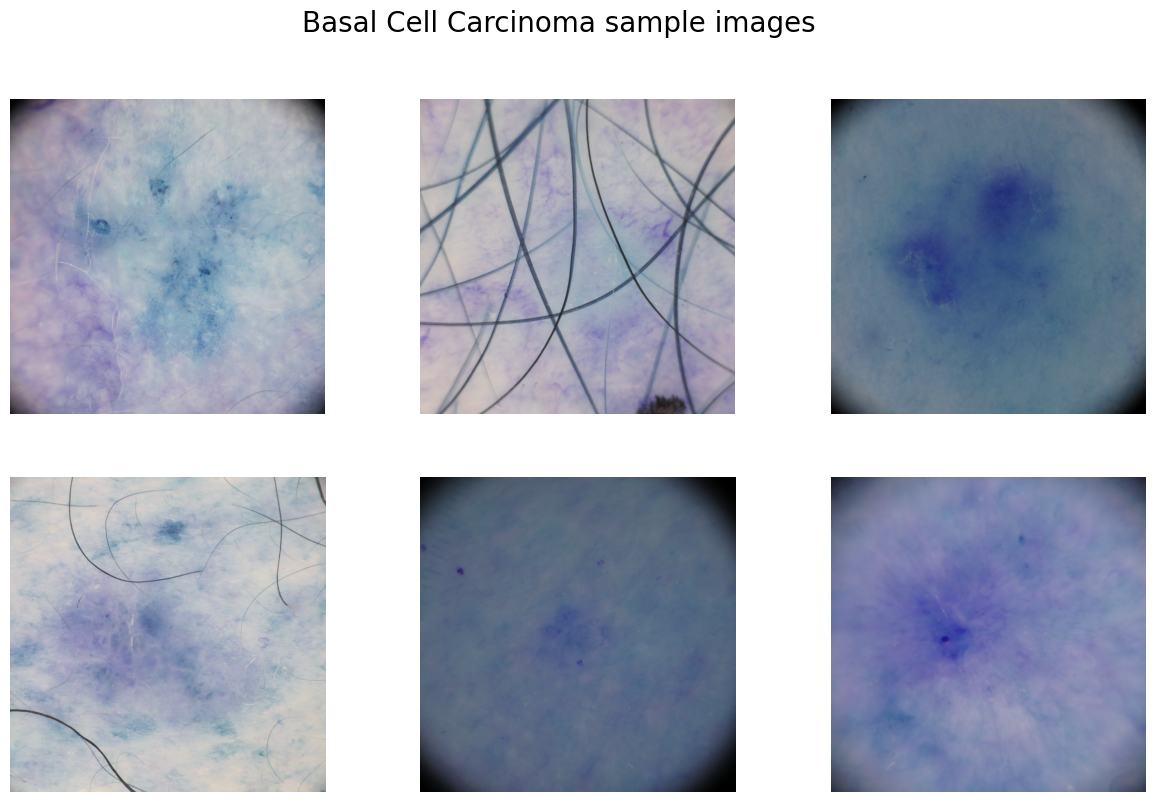

In [6]:
# Check the number of files in B_DIR
num_files_in_B_DIR = len(Bimages)
print(f"Number of files in {B_DIR}: {num_files_in_B_DIR}")

# Get the minimum between 6 and the actual number of files
num_samples = min(6, num_files_in_B_DIR)

# Sample from Bimages, ensuring the sample size doesn't exceed the population
sample_parasite = random.sample(Bimages, num_samples)

f, ax = plt.subplots(2, 3, figsize=(15, 9))

for i in range(num_samples):  # Iterate over the actual number of samples
    im = cv2.imread(os.path.join(B_DIR, sample_parasite[i]))  # Use os.path.join for safe path construction

    # Check if image was loaded successfully
    if im is not None:
        ax[i // 3, i % 3].imshow(im)
        ax[i // 3, i % 3].axis('off')
    else:
        print(f"Failed to load image: {os.path.join(B_DIR, sample_parasite[i])}")

f.suptitle('Basal Cell Carcinoma sample images', fontsize=20)
plt.show()

Number of files in /content/drive/Othercomputers/My_Laptop/ISIC_2019_Training_Input/Melanoma/Train: 1500


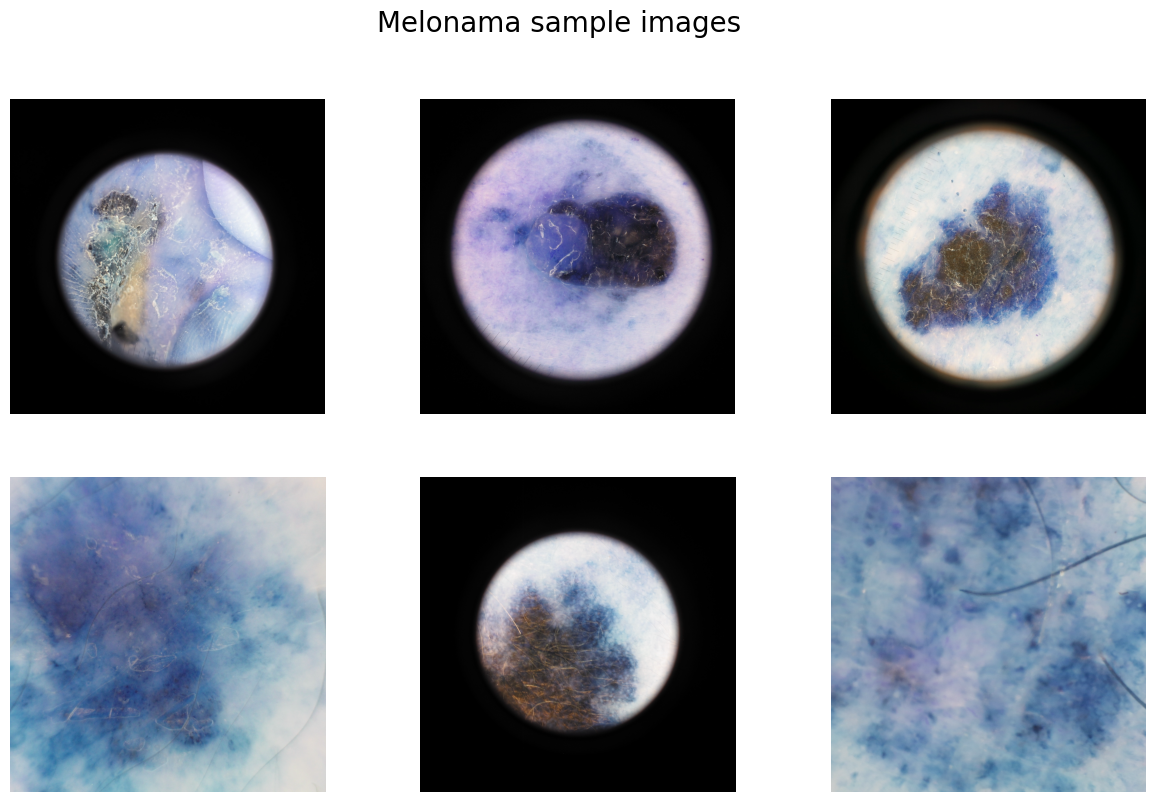

In [7]:
# Check the number of files in M_DIR
num_files_in_M_DIR = len(Mimages)
print(f"Number of files in {M_DIR}: {num_files_in_M_DIR}")

# Get the minimum between 6 and the actual number of files
num_samples = min(6, num_files_in_M_DIR)

# Sample from Mimages, ensuring the sample size doesn't exceed the population
sample_parasite = random.sample(Mimages, num_samples)

f, ax = plt.subplots(2, 3, figsize=(15, 9))

for i in range(num_samples):  # Iterate over the actual number of samples
    im = cv2.imread(os.path.join(M_DIR, sample_parasite[i]))  # Use os.path.join for safe path construction

    # Check if image was loaded successfully
    if im is not None:
        ax[i // 3, i % 3].imshow(im)
        ax[i // 3, i % 3].axis('off')
    else:
        print(f"Failed to load image: {os.path.join(M_DIR, sample_parasite[i])}")

f.suptitle('Melonama sample images', fontsize=20)
plt.show()

Number of files in /content/drive/Othercomputers/My_Laptop/ISIC_2019_Training_Input/Nevus/Train: 1500


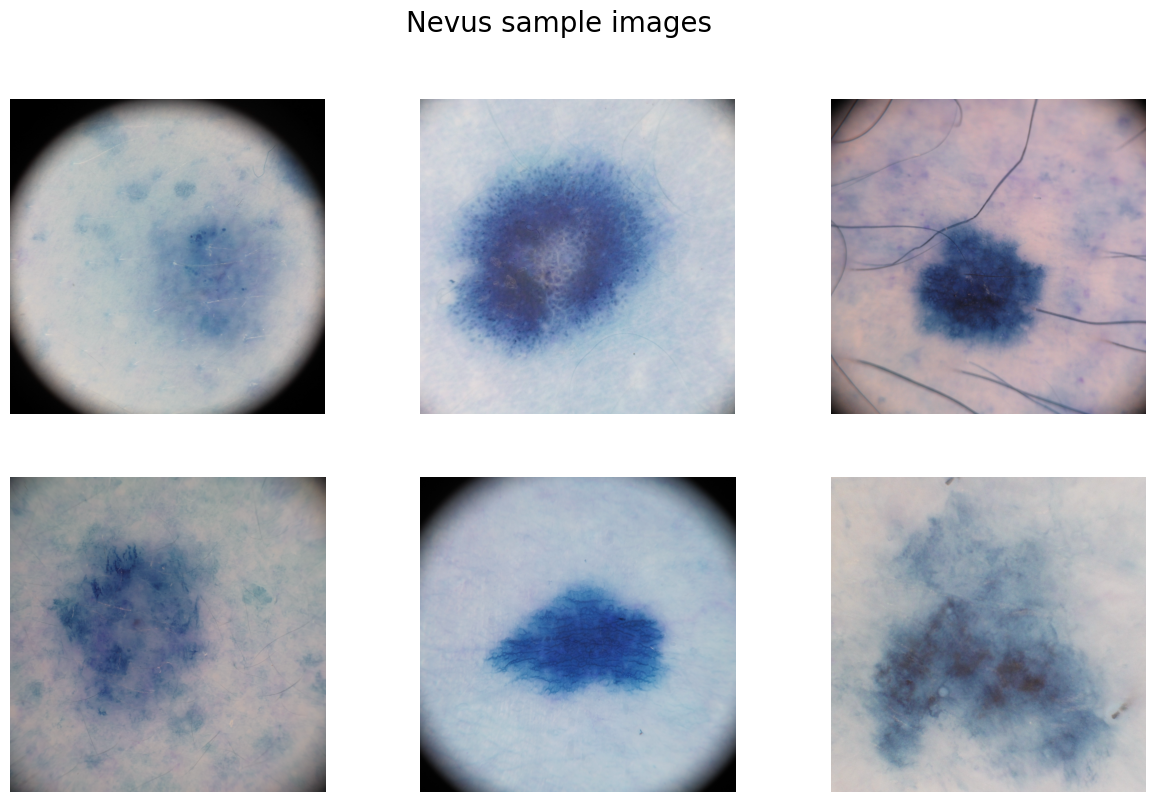

In [8]:
# Check the number of files in N_DIR
num_files_in_N_DIR = len(Nimages)
print(f"Number of files in {N_DIR}: {num_files_in_N_DIR}")

# Get the minimum between 6 and the actual number of files
num_samples = min(6, num_files_in_N_DIR)

# Sample from Nimages, ensuring the sample size doesn't exceed the population
sample_parasite = random.sample(Nimages, num_samples)

f, ax = plt.subplots(2, 3, figsize=(15, 9))

for i in range(num_samples):  # Iterate over the actual number of samples
    im = cv2.imread(os.path.join(N_DIR, sample_parasite[i]))  # Use os.path.join for safe path construction

    # Check if image was loaded successfully
    if im is not None:
        ax[i // 3, i % 3].imshow(im)
        ax[i // 3, i % 3].axis('off')
    else:
        print(f"Failed to load image: {os.path.join(N_DIR, sample_parasite[i])}")

f.suptitle('Nevus sample images', fontsize=20)
plt.show()

In [ ]:
'''data=[]
labels=[]
Basal=os.listdir("D:\\ISIC_2019_Training_Input\\Basal_cell_carcinoma\\Train")
for a in Basal:
    try:
        image=cv2.imread(os.path.join("D:\\ISIC_2019_Training_Input\\Basal_cell_carcinoma\\Train"+a))
        image_from_array = Image.fromarray(image, 'RGB')
        size_image = image_from_array.resize((224, 224))
        data.append(np.array(size_image))
        labels.append(0)
    except AttributeError:
        print("")

Melanoma=os.listdir("D:\\ISIC_2019_Training_Input\\Melanoma\\Train")
for b in Melanoma:
    try:
        image=cv2.imread(os.path.join("D:\\ISIC_2019_Training_Input\\Melanoma\\Train"+b))
        image_from_array = Image.fromarray(image, 'RGB')
        size_image = image_from_array.resize((224, 224))
        data.append(np.array(size_image))
        labels.append(1)
    except AttributeError:
        print("")
Nevus=os.listdir("D:\\ISIC_2019_Training_Input\\Nevus\\Train")
for c in Nevus:
    try:
        image=cv2.imread(os.path.join("D:\\ISIC_2019_Training_Input\\Nevus\\Train"+c))
        image_from_array = Image.fromarray(image, 'RGB')
        size_image = image_from_array.resize((224, 224))
        data.append(np.array(size_image))
        labels.append(2)
    except AttributeError:
        print("")'''

In [ ]:
'''feats=np.array(data)
labels=np.array(labels)

# saving features and labels for later re-use
np.save("D:\\ISIC_2019_Training_Input\\feats_train_new",feats)
np.save("D:\\ISIC_2019_Training_Input\\labels_train_new",labels)'''

In [9]:
feats=np.load("/content/drive/Othercomputers/My_Laptop/ISIC_2019_Training_Input/feats_train_new.npy")
labels=np.load("/content/drive/Othercomputers/My_Laptop/ISIC_2019_Training_Input/labels_train_new.npy")

In [10]:
s=np.arange(feats.shape[0])
np.random.shuffle(s)
feats=feats[s]
labels=labels[s]

In [11]:
num_classes=len(np.unique(labels))
len_data=len(feats)
print(len_data)

4500


In [12]:
print(num_classes)

3


In [15]:
# splitting cells images into 80:20 ratio i.e., 80% for training and 20% for testing purpose
(x_train,x_test)=feats[(int)(0.4*len_data):],feats[:(int)(0.4*len_data)]

(y_train,y_test)=labels[(int)(0.4*len_data):],labels[:(int)(0.4*len_data)]

In [16]:
x_train = x_train.astype('float32')/255 # As we are working on image data we are normalizing data by dividing 255.
x_test = x_test.astype('float32')/255
train_len=len(x_train)
test_len=len(x_test)

In [17]:
y_train=to_categorical(y_train,3)
y_test=to_categorical(y_test,3)

In [18]:
trainAug  = ImageDataGenerator(
featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)

In [ ]:
conv_base = MobileNetV2(
    include_top=False,
    input_shape=(224, 224, 3),
    weights='imagenet')

for layer in conv_base.layers:
    layer.trainable = True

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


dense layer 256 se 128 krdi to simplfy the complexity of model


In [ ]:
x = conv_base.output
x = layers.GlobalAveragePooling2D()(x)
#x = layers.Dense(128, activation='relu')(x)
#x = layers.Dropout(0.2)(x)
x = layers.Dense(64, activation='relu')(x)
x = layers.Dropout(0.1)(x)
predictions = layers.Dense(3, activation='softmax')(x)
model = Model(conv_base.input, predictions)

In [ ]:
callbacks = [ModelCheckpoint('.mdl_wts.keras', monitor='val_loss',mode='min',verbose=1, save_best_only=True),
             ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=2, verbose=1, mode='min', min_lr=0.00000000001)]


In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
BS =180
print("[INFO] training head...")
H = model.fit(
	trainAug.flow(x_train,y_train, batch_size=BS),
	steps_per_epoch=train_len // BS,
	validation_data=(x_test, y_test),
	validation_steps=test_len // BS,
	epochs=10,callbacks=callbacks)


[INFO] training head...


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
11/15 ━━━━━━━━━━━━━━━━━━━━ 4:02 61s/step - accuracy: 0.5843 - loss: 0.9278

In [13]:
model = load_model('.mdl_wts.keras')
model.save('/content/drive/Othercomputers/My_Laptop/ISIC_2019_Training_Input/model_v1.h5')

ValueError: File not found: filepath=.mdl_wts.keras. Please ensure the file is an accessible `.keras` zip file.

In [19]:
model = load_model('/content/drive/Othercomputers/My_Laptop/ISIC_2019_Training_Input/model_v1.h5')
# checking the accuracy
accuracy = model.evaluate(x_test, y_test, verbose=1)
print('\n', 'Test_Accuracy:-', accuracy[1])

57/57 ━━━━━━━━━━━━━━━━━━━━ 76s 1s/step - accuracy: 0.5820 - loss: 1.3397

 Test_Accuracy:- 0.5827777981758118


In [20]:
rounded_predictions = model.predict(x_test, batch_size=16, verbose=0)
rounded_predictions[1]

array([5.7562685e-01, 4.2437303e-01, 2.1964630e-07], dtype=float32)

113/113 ━━━━━━━━━━━━━━━━━━━━ 62s 537ms/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 61s 544ms/step


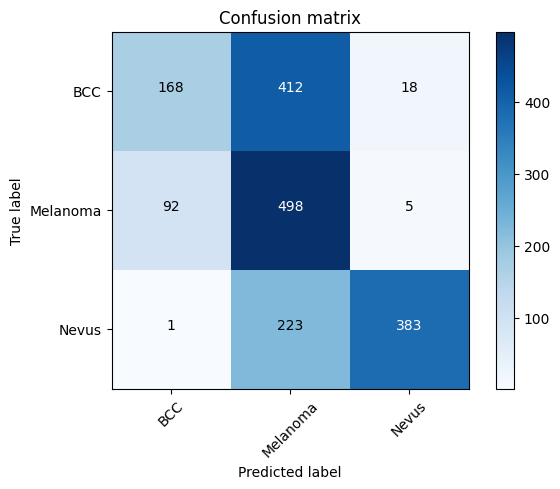

In [21]:
pred = np.argmax(rounded_predictions,axis=1)
rounded_labels=np.argmax(y_test, axis=1)

pred_Y = model.predict(x_test, batch_size = 16, verbose = True)
BS=16
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    target_names =['BCC','Melanoma','Nevus']

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Predict the values from the validation dataset
Y_pred = model.predict(x_test, batch_size=BS)
# Convert predictions classes to one hot vectors
Y_pred_classes = np.argmax(pred_Y,axis=1)
# Convert validation observations to one hot vectors
# compute the confusion matrix
rounded_labels=np.argmax(y_test, axis=1)
confusion_mtx = confusion_matrix(rounded_labels, Y_pred_classes)



# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(3))

In [22]:
predIdxs = model.predict(x_test, batch_size=BS)

# for each image in the testing set we need to find the index of the
# label with corresponding largest predicted probability
predIdxs = np.argmax(predIdxs, axis=1)
rounded_labels=np.argmax(y_test, axis=1)

# show a nicely formatted classification report
print(classification_report(rounded_labels, predIdxs,target_names=['BCC','Melanoma','Nevus']))

113/113 ━━━━━━━━━━━━━━━━━━━━ 58s 514ms/step
              precision    recall  f1-score   support

         BCC       0.64      0.28      0.39       598
    Melanoma       0.44      0.84      0.58       595
       Nevus       0.94      0.63      0.76       607

    accuracy                           0.58      1800
   macro avg       0.68      0.58      0.57      1800
weighted avg       0.68      0.58      0.58      1800



113/113 ━━━━━━━━━━━━━━━━━━━━ 59s 517ms/step


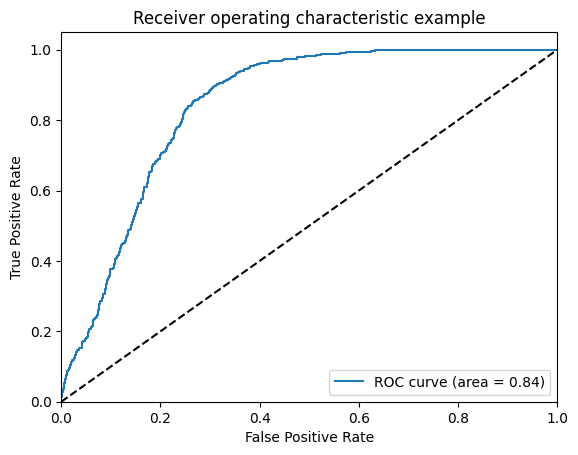

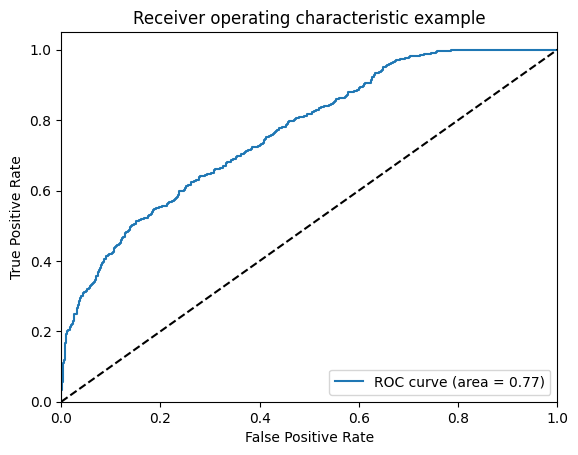

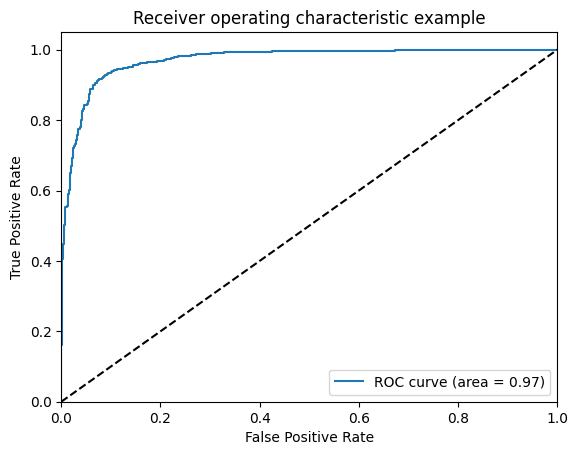

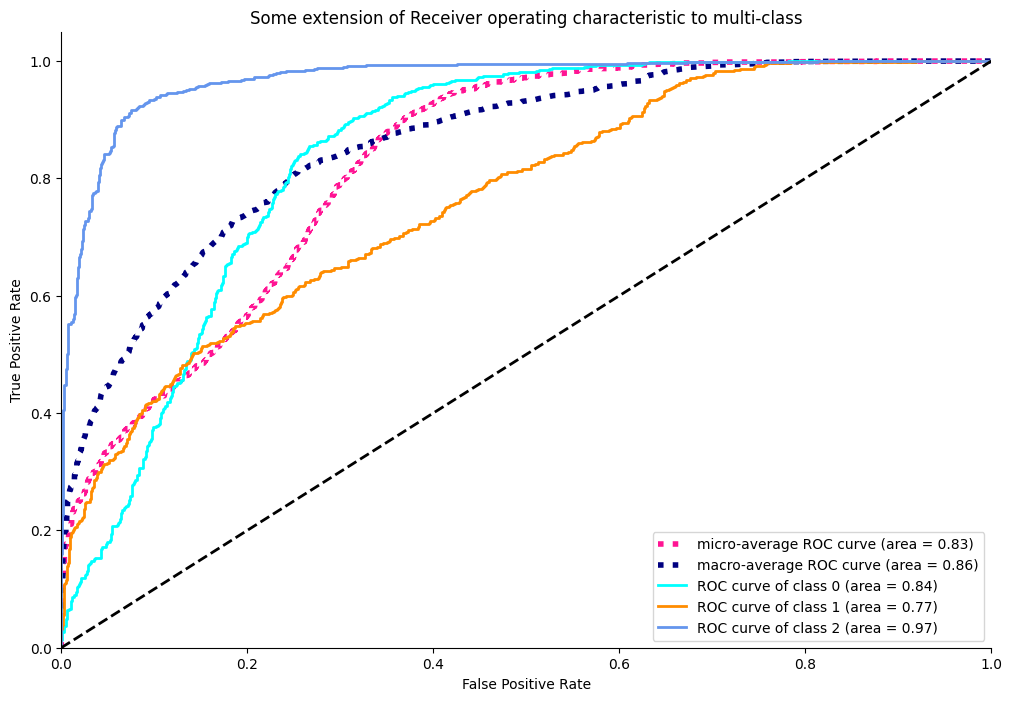

In [24]:
import seaborn as sns
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.preprocessing import label_binarize
from scipy.interpolate import interp1d
from itertools import cycle
import pandas as pd
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc


y_test = np.array(y_test)

n_classes = 3

pred_Y = model.predict(x_test, batch_size = 16, verbose = True)
# Plot linewidth.
lw = 2

# Compute ROC curve and ROC area for each class


# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], pred_Y[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    # Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), pred_Y.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
# Plot of a ROC curve for a specific class
for i in range(n_classes):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
fig = plt.figure(figsize=(12, 8))
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))


plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
sns.despine()
plt.show()

In [26]:
data=[]
labels=[]
Basal=os.listdir("/content/drive/Othercomputers/My_Laptop/ISIC_2019_Training_Input/Basal_cell_carcinoma/Test/")
for a in Basal:
    try:
        image=cv2.imread("/content/drive/Othercomputers/My_Laptop/ISIC_2019_Training_Input/Basal_cell_carcinoma/Test/"+a)
        image_from_array = Image.fromarray(image, 'RGB')
        size_image = image_from_array.resize((224, 224))
        data.append(np.array(size_image))
        labels.append(0)
    except AttributeError:
        print("")

Melanoma=os.listdir("/content/drive/Othercomputers/My_Laptop/ISIC_2019_Training_Input/Melanoma/Test/")
for b in Melanoma:
    try:
        image=cv2.imread("/content/drive/Othercomputers/My_Laptop/ISIC_2019_Training_Input/Melanoma/Test/"+b)
        image_from_array = Image.fromarray(image, 'RGB')
        size_image = image_from_array.resize((224, 224))
        data.append(np.array(size_image))
        labels.append(1)
    except AttributeError:
        print("")
Nevus=os.listdir("/content/drive/Othercomputers/My_Laptop/ISIC_2019_Training_Input/Nevus/Test/")
for c in Nevus:
    try:
        image=cv2.imread("/content/drive/Othercomputers/My_Laptop/ISIC_2019_Training_Input/Nevus/Test/"+c)
        image_from_array = Image.fromarray(image, 'RGB')
        size_image = image_from_array.resize((224, 224))
        data.append(np.array(size_image))
        labels.append(2)
    except AttributeError:
        print("")

In [27]:
feats_test=np.array(data)
labels_test=np.array(labels)

np.save("/content/drive/Othercomputers/My_Laptop/ISIC_2019_Training_Input/feats_test",feats_test)
np.save("/content/drive/Othercomputers/My_Laptop/ISIC_2019_Training_Input/labels_test",labels_test)

In [28]:
feats_test=np.load("/content/drive/Othercomputers/My_Laptop/ISIC_2019_Training_Input/feats_test.npy")
labels_test=np.load("/content/drive/Othercomputers/My_Laptop/ISIC_2019_Training_Input/labels_test.npy")

num_classes=len(np.unique(labels_test))
len_data=len(feats_test)
print(len_data)

150


In [29]:
x_valid = feats_test.astype('float32')/255
y_valid=to_categorical(labels_test,3)

15/15 ━━━━━━━━━━━━━━━━━━━━ 8s 536ms/step
15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 288ms/step


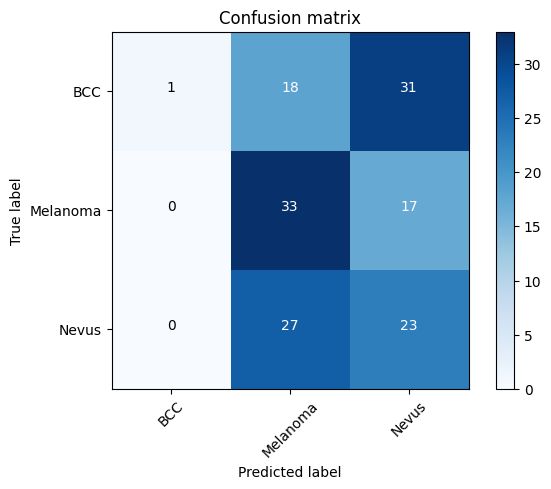

In [30]:
pred_Y = model.predict(x_valid, batch_size = 10, verbose = True)
rounded_predictions = model.predict(x_valid, batch_size=16, verbose=0)
pred = np.argmax(rounded_predictions,axis=1)
rounded_labels=np.argmax(y_valid, axis=1)
BS=10
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    target_names =['BCC','Melanoma','Nevus']

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Predict the values from the validation dataset
Y_pred = model.predict(x_valid, batch_size=BS)
# Convert predictions classes to one hot vectors
Y_pred_classes = np.argmax(pred_Y,axis=1)
# Convert validation observations to one hot vectors
# compute the confusion matrix
rounded_labels=np.argmax(y_valid, axis=1)
confusion_mtx = confusion_matrix(rounded_labels, Y_pred_classes)
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(3))

In [31]:
model = load_model('/content/drive/Othercomputers/My_Laptop/ISIC_2019_Training_Input/model_v1.h5')

In [43]:
img1 = "/content/drive/Othercomputers/My_Laptop/ISIC_2019_Training_Input/Melanoma/Test/melanoma_ISIC_0000029_downsampled.jpg"
img2 ="/content/drive/Othercomputers/My_Laptop/ISIC_2019_Training_Input/Melanoma/Test/melanoma_ISIC_0000002.jpg"
img3 = "/content/drive/Othercomputers/My_Laptop/ISIC_2019_Training_Input/Basal_cell_carcinoma/Test/bcc_ISIC_0024332.jpg"

In [44]:
class_dict ={0:"Basal_Cell_Carcinoma (Cancer)",
             1:"Melanoma (Cancer)",
             2:"Nevus (Non-Cancerous)"}

In [34]:
def pred_image(img_path,model):
  img = Image.open(img_path).resize((224,224)) #target_size must agree with what the trained model expects!!
  # Preprocessing the image
  img = image.img_to_array(img)
  img = np.expand_dims(img, axis=0)
  img = img.astype('float32')/255

  preds = model.predict(img)[0]
  prediction = sorted(
      [(class_dict[i], round(j*100, 2)) for i, j in enumerate(preds)],
      reverse=True,
      key=lambda x: x[1]
  )

  return prediction

In [38]:
# from IPython.display import  display
# def pred_image(img_path,model):
#   img = Image.open(img_path).resize((224,224)) #target_size must agree with what the trained model expects!!
#   # Preprocessing the image
#   img = image.img_to_array(img)
#   img = np.expand_dims(img, axis=0)
#   img = img.astype('float32')/255

#   preds = model.predict(img)
#   pred = np.argmax(preds,axis = 1)
#   pred_cat = [k for k, v in class_dict.items() if v == pred[0]][0]

#   return pred_cat

from IPython.display import  display
def pred_image(img_path,model):
  img = Image.open(img_path).resize((224,224)) #target_size must agree with what the trained model expects!!
  # Preprocessing the image
  img = image.img_to_array(img)
  img = np.expand_dims(img, axis=0)
  img = img.astype('float32')/255

  preds = model.predict(img)
  pred = np.argmax(preds,axis = 1)
  #pred_cat = [k for k, v in class_dict.items() if v == pred[0]][0] #Replaced with following:
  pred_cat = class_dict.get(pred[0]) # Get the category label directly

  return pred_cat

In [45]:
pred_image(img1,model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


'Nevus (Non-Cancerous)'

In [46]:
pred_image(img2,model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


'Melanoma (Cancer)'

In [47]:
pred_image(img3,model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


'Nevus (Non-Cancerous)'

57/57 ━━━━━━━━━━━━━━━━━━━━ 74s 1s/step


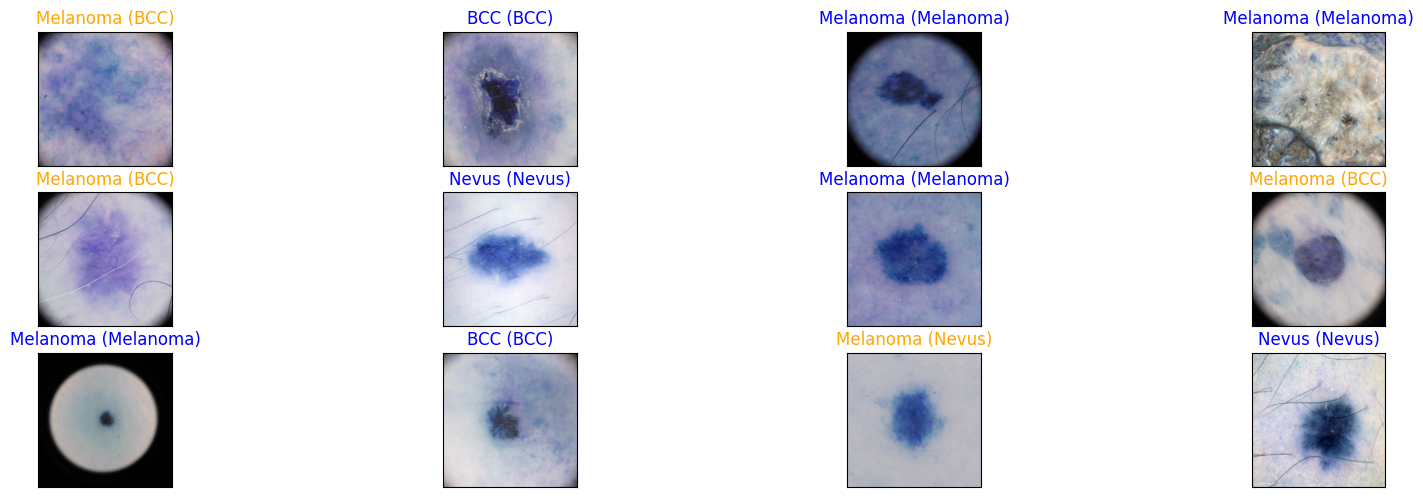

In [48]:
y_hat = model.predict(x_test)

# define text labels
skin_labels = ['BCC','Melanoma','Nevus']

# plot a random sample of test images, their predicted labels, and ground truth
fig = plt.figure(figsize=(20, 8))
for i, idx in enumerate(np.random.choice(x_test.shape[0], size=12, replace=False)):
    ax = fig.add_subplot(4,4, i+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_test[idx]))
    pred_idx = np.argmax(y_hat[idx])
    true_idx = np.argmax(y_test[idx])
    ax.set_title("{} ({})".format(skin_labels[pred_idx], skin_labels[true_idx]),
                 color=("blue" if pred_idx == true_idx else "orange"))